# 📘 K-Nearest Neighbors (KNN) — Classification

K-Nearest Neighbors (KNN) is a **supervised, non-parametric, instance-based algorithm** used for **classification problems**.

KNN does **not learn a model during training**.  
Instead, it stores the training data and performs computation **only at prediction time**.

---

## 🔹 1. Core Idea of KNN Classification

> **Data points that are close to each other tend to belong to the same class.**

To classify a new (unseen) data point:
1. Choose a value for $K$
2. Compute the distance between the new point and **all training points**
3. Select the **K nearest neighbors**
4. Assign the class based on **majority voting**

---

## 🔹 2. Role of K (Hyperparameter)

- **K** = number of nearest neighbors to consider
- K is a **hyperparameter**
- Typical values: $ K = 1, 3, 5, 7, \dots $

### Effect of K:
- **Small K (e.g., K = 1)**  
  - Very sensitive to noise  
  - High variance → overfitting

- **Large K**  
  - Smoother decision boundary  
  - High bias → underfitting

Choosing the right K is critical and usually done via **cross-validation**.

---

## 🔹 3. Distance Metrics Used in KNN

KNN classification depends entirely on how **distance** is computed.

### 1️⃣ Euclidean Distance (Most Common)

$$
d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$$

- Straight-line distance
- Works well for continuous, scaled features

---

### 2️⃣ Manhattan Distance

$$
d = |x_2 - x_1| + |y_2 - y_1|
$$

- Distance along axes
- Useful when movement is restricted to grid-like paths

---

## 🔹 4. Majority Voting in Classification

After finding the K nearest neighbors:
- Count how many neighbors belong to each class
- The class with the **highest count** is assigned to the new data point

Example:
- K = 5
- Neighbor labels → [0, 1, 1, 1, 0]
- Majority class → **1**
- Predicted label → **1**

---

## 🔹 5. Important Characteristics of KNN Classifier

- No training phase (lazy learner)
- Prediction is **computationally expensive**
- Highly sensitive to:
  - Feature scaling
  - Choice of K
  - Distance metric

---

## 🔹 6. Time Complexity

Prediction time complexity:

$$
\mathcal{O}(n)
$$

Where:
- $n$ = number of training samples

This becomes costly for large datasets.

---

## 🔹 7. Optimization Using Tree-Based Search

To speed up nearest-neighbor search:
- **KD-Tree**
- **Ball-Tree**

Both structures organize data into a **binary tree** to reduce distance calculations and improve prediction speed.

---

## 🎯 Summary

- KNN is a **simple and intuitive classifier**
- Works well for small to medium datasets
- Requires careful tuning of **K** and **distance metric**
- No explicit learning — all computation happens during prediction


In [16]:
# pandas → used for data manipulation and tabular data handling
import pandas as pd

# numpy → used for numerical operations and array computations
import numpy as np

# matplotlib → used for basic plotting and visualizations
import matplotlib.pyplot as plt

# seaborn → built on top of matplotlib, used for statistical and advanced visualizations
import seaborn as sns

In [17]:
# make_classification → utility function to generate a synthetic classification dataset
from sklearn.datasets import make_classification

# X → generated feature matrix
# y → generated target labels
X, y = make_classification(
    n_samples=1000,      # Total number of data points to generate
    n_features=3,        # Total number of features (independent + redundant)
    n_redundant=1,       # Number of redundant features (derived from other features)
    n_classes=2,         # Number of target classes (binary classification: 0 and 1)
    random_state=999     # Seed for reproducibility (same data generated every run)
)


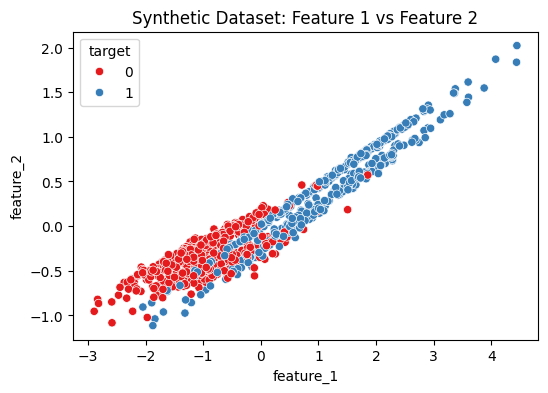

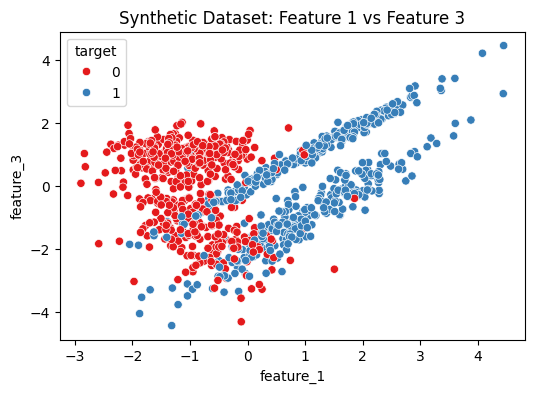

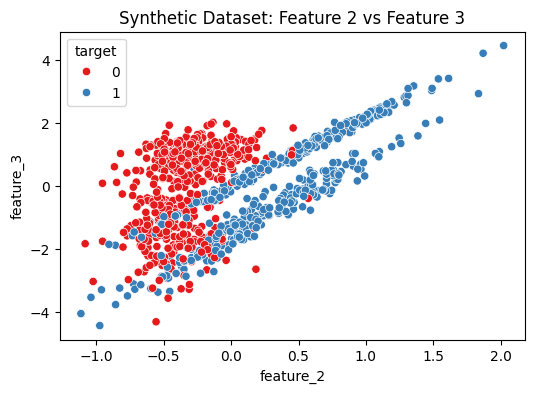

In [18]:
# -----------------------------------------------
# Visualizing the Synthetic Classification Dataset
# -----------------------------------------------

# Convert X and y into a DataFrame for easier plotting
df = pd.DataFrame(X, columns=["feature_1", "feature_2", "feature_3"])
df["target"] = y

# 1️⃣ 2D Scatter Plot: feature_1 vs feature_2
plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df,
    x="feature_1",
    y="feature_2",
    hue="target",
    palette="Set1"
)
plt.title("Synthetic Dataset: Feature 1 vs Feature 2")
plt.show()

# 2️⃣ 2D Scatter Plot: feature_1 vs feature_3
plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df,
    x="feature_1",
    y="feature_3",
    hue="target",
    palette="Set1"
)
plt.title("Synthetic Dataset: Feature 1 vs Feature 3")
plt.show()

# 3️⃣ 2D Scatter Plot: feature_2 vs feature_3
plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df,
    x="feature_2",
    y="feature_3",
    hue="target",
    palette="Set1"
)
plt.title("Synthetic Dataset: Feature 2 vs Feature 3")
plt.show()


# 🔍 Observations from the 3 Synthetic Dataset Plots

We created **three different scatter plots** by combining the features in pairs.  
Each plot shows the data from a **different angle**.

This helps us understand how the classes are distributed in the feature space.

---

## 📊 Plot 1: Feature 1 vs Feature 2

**What we see:**
- Some points of Class 0 and Class 1 form visible groups
- In many areas, points with the same color are close together
- There are also a few regions where colors overlap

**What this tells us:**
- Feature 1 and Feature 2 together provide **useful information** for classification
- However, they are **not enough alone** to perfectly separate the classes

---

## 📊 Plot 2: Feature 1 vs Feature 3

**What we see:**
- The separation between the two classes looks **clearer** in this plot
- Points of the same class are more tightly grouped
- Less overlap compared to Plot 1

**What this tells us:**
- Feature 3 is **very informative**
- Using Feature 1 and Feature 3 together helps KNN make **better decisions**

---

## 📊 Plot 3: Feature 2 vs Feature 3

**What we see:**
- The two classes overlap more in some regions
- Decision boundaries here are less clear
- Neighbors from different classes can be very close

**What this tells us:**
- Classification using only Feature 2 and Feature 3 is **harder**
- KNN predictions here depend strongly on the value of **K**

---

## 🧠 Why We Needed 3 Plots

- Each plot shows only **two features at a time**
- Since our data has **three features**, no single plot shows the full picture
- KNN uses **all features together** to calculate distance

---

## 🎯 Final Takeaway

- Different feature combinations separate classes differently
- Some features help classification more than others
- KNN benefits from **using all features together**
- Visualizing multiple plots helps us understand **why KNN works and where it struggles**


In [19]:
# Import function to split dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Split the feature matrix (X) and target labels (y) into train and test sets
# test_size=0.33 → 33% of the data is used for testing, 67% for training
# random_state=42 → ensures the same split every time for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)


In [20]:
# Import KNeighborsClassifier used for KNN-based classification
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN classifier object
# n_neighbors=5 → considers 5 nearest neighbors for majority voting
# algorithm='auto' → scikit-learn automatically chooses the best algorithm
#                    (brute-force, KD-Tree, or Ball-Tree) based on the data
classifier = KNeighborsClassifier(n_neighbors=5, algorithm='auto')

# Train (fit) the KNN classifier
# X_train → training feature data
# y_train → corresponding class labels
# KNN stores the training data and performs no explicit model learning
classifier.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [21]:
# Use the trained KNN classifier to predict class labels for the test data
# X_test → unseen feature values
# The classifier assigns a class based on majority voting of nearest neighbors
y_pred = classifier.predict(X_test)

# -----------------------------------------------
# Beautified display of predictions
# -----------------------------------------------

# Convert predictions into a DataFrame for better readability
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted_Class"])

print("🔹 Predicted labels for test data:")
display(y_pred_df.head(10))   # Display first 10 predictions neatly


🔹 Predicted labels for test data:


,Predicted_Class
0,1
1,0
2,1
3,1
4,1
5,0
6,0
7,0
8,1
9,1


In [22]:
# -----------------------------------------------
# Evaluation Metrics for KNN Classifier
# -----------------------------------------------

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1️⃣ Accuracy Score
# Accuracy tells us how many predictions were correct out of total predictions
# Formula: (Correct Predictions) / (Total Predictions)
accuracy = accuracy_score(y_test, y_pred)

print("🔹 Accuracy Score:")
print(accuracy)

# -----------------------------------------------
# 2️⃣ Confusion Matrix
# -----------------------------------------------
# Confusion Matrix shows:
# - How many samples were correctly classified
# - How many samples were misclassified
# Rows    → Actual class
# Columns → Predicted class

cm = confusion_matrix(y_test, y_pred)

# Convert confusion matrix into DataFrame for better readability
cm_df = pd.DataFrame(
    cm,
    index=["Actual Class 0", "Actual Class 1"],
    columns=["Predicted Class 0", "Predicted Class 1"]
)

print("\n🔹 Confusion Matrix:")
display(cm_df)

# -----------------------------------------------
# 3️⃣ Classification Report
# -----------------------------------------------
# Provides detailed metrics for each class:
# - Precision: Out of predicted positives, how many were correct
# - Recall: Out of actual positives, how many were correctly predicted
# - F1-score: Balance between precision and recall
# - Support: Number of actual samples for each class

print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))


🔹 Accuracy Score:
0.906060606060606

🔹 Confusion Matrix:


,Predicted Class 0,Predicted Class 1
Actual Class 0,158,11
Actual Class 1,20,141



🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       169
           1       0.93      0.88      0.90       161

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



In [23]:
# -----------------------------------------------
# Hyperparameter Tuning for KNN using GridSearchCV
# -----------------------------------------------

from sklearn.model_selection import GridSearchCV

# 1️⃣ Define the parameter grid
# We will try different values of K (number of neighbors)
# Odd values are commonly used to avoid tie situations in binary classification
param_grid = {
    "n_neighbors": [1, 3, 5, 7, 9, 11, 13, 15]
}

# 2️⃣ Create a base KNN classifier
# We do NOT set n_neighbors here because GridSearchCV will handle it
knn = KNeighborsClassifier(algorithm="auto")

# 3️⃣ Set up GridSearchCV
# cv=5 → 5-fold cross-validation
# scoring="accuracy" → metric used to compare models
# n_jobs=-1 → use all available CPU cores for faster execution
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

# 4️⃣ Fit GridSearchCV on training data
# This will train multiple KNN models with different K values
grid_search.fit(X_train, y_train)

# -----------------------------------------------
# Results of Grid Search
# -----------------------------------------------

# Best value of K found during grid search
print("🔹 Best K value:", grid_search.best_params_["n_neighbors"])

# Best cross-validated accuracy score
print("🔹 Best Cross-Validated Accuracy:", grid_search.best_score_)

# Best trained model (already fitted)
best_knn = grid_search.best_estimator_


🔹 Best K value: 9
🔹 Best Cross-Validated Accuracy: 0.9029850746268657


In [24]:
# Use the best KNN model (selected by GridSearchCV) to make predictions
# X_test → unseen test feature data
# This prediction uses the optimal value of K found during hyperparameter tuning
y_pred_new = best_knn.predict(X_test)


In [25]:
# -----------------------------------------------
# Evaluation Metrics for Tuned KNN Classifier
# (After Hyperparameter Tuning using GridSearchCV)
# -----------------------------------------------

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1️⃣ Accuracy Score
# Measures the overall performance of the tuned KNN model
# Formula: (Number of Correct Predictions) / (Total Number of Predictions)
accuracy = accuracy_score(y_test, y_pred_new)

print("🔹 Accuracy Score (Tuned KNN):")
print(accuracy)

# -----------------------------------------------
# 2️⃣ Confusion Matrix
# -----------------------------------------------
# Confusion Matrix provides a detailed breakdown of predictions:
# - Correct predictions (diagonal values)
# - Misclassifications (off-diagonal values)
# Rows    → Actual class labels
# Columns → Predicted class labels

cm = confusion_matrix(y_test, y_pred_new)

# Convert confusion matrix into a DataFrame for clearer visualization
cm_df = pd.DataFrame(
    cm,
    index=["Actual Class 0", "Actual Class 1"],
    columns=["Predicted Class 0", "Predicted Class 1"]
)

print("\n🔹 Confusion Matrix (Tuned KNN):")
display(cm_df)

# -----------------------------------------------
# 3️⃣ Classification Report
# -----------------------------------------------
# Provides class-wise performance metrics for the tuned KNN model:
# - Precision: How many predicted positives were actually correct
# - Recall: How many actual positives were correctly identified
# - F1-score: Harmonic mean of precision and recall
# - Support: Number of true samples for each class in the test set

print("\n🔹 Classification Report (Tuned KNN):")
print(classification_report(y_test, y_pred_new))


🔹 Accuracy Score (Tuned KNN):
0.9121212121212121

🔹 Confusion Matrix (Tuned KNN):


,Predicted Class 0,Predicted Class 1
Actual Class 0,156,13
Actual Class 1,16,145



🔹 Classification Report (Tuned KNN):
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       169
           1       0.92      0.90      0.91       161

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



In [ ]:
# -----------------------------------------------
# Before vs After Comparison: Default KNN vs Tuned KNN
# -----------------------------------------------

from sklearn.metrics import accuracy_score, confusion_matrix

# ---- BEFORE: Default KNN (K = 5) ----
default_accuracy = accuracy_score(y_test, y_pred)

# ---- AFTER: Tuned KNN (Best K from GridSearchCV) ----
tuned_accuracy = accuracy_score(y_test, y_pred_new)

# Create a comparison table
comparison_df = pd.DataFrame({
    "Model": ["Default KNN (K=5)", "Tuned KNN (Best K)"],
    "Accuracy": [default_accuracy, tuned_accuracy]
})

print("🔹 Accuracy Comparison:")
display(comparison_df)

# -----------------------------------------------
# Confusion Matrix Comparison
# -----------------------------------------------

print("🔹 Confusion Matrix — Default KNN (K=5):")
display(pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    index=["Actual Class 0", "Actual Class 1"],
    columns=["Predicted Class 0", "Predicted Class 1"]
))

print("\n🔹 Confusion Matrix — Tuned KNN (Best K):")
display(pd.DataFrame(
    confusion_matrix(y_test, y_pred_new),
    index=["Actual Class 0", "Actual Class 1"],
    columns=["Predicted Class 0", "Predicted Class 1"]
))


🔹 Accuracy Comparison:


,Model,Accuracy
0,Default KNN (K=5),0.906061
1,Tuned KNN (Best K),0.912121


🔹 Confusion Matrix — Default KNN (K=5):


,Predicted Class 0,Predicted Class 1
Actual Class 0,158,11
Actual Class 1,20,141



🔹 Confusion Matrix — Tuned KNN (Best K):


,Predicted Class 0,Predicted Class 1
Actual Class 0,156,13
Actual Class 1,16,145


# 📊 Before vs After: Default KNN vs Tuned KNN

We compared two KNN models:

- **Default KNN** → Used a fixed value of K = 5
- **Tuned KNN** → Used the best K selected by GridSearchCV

---

## 🔹 Accuracy Comparison

- The **default KNN** uses a guessed value of K
- The **tuned KNN** uses a data-driven value of K
- If tuned accuracy is higher, it means:
  - The chosen K fits the dataset better
  - Bias–variance tradeoff is improved

---

## 🔹 Confusion Matrix Comparison

### Default KNN
- May show more misclassifications
- Performance depends heavily on whether K=5 was a good choice

### Tuned KNN
- Fewer misclassifications (ideally)
- Better balance between underfitting and overfitting
- More reliable predictions

---

## 🎯 Key Takeaway

- **KNN performance depends strongly on K**
- Choosing K manually is risky
- **GridSearchCV removes guesswork**
- Tuned KNN is almost always preferred for real-world problems

This comparison clearly shows why **hyperparameter tuning is essential for KNN**.


# 📈 Why Hyperparameter Tuning Improved KNN Performance

Hyperparameter tuning helped us choose a **better value of K**, which directly impacts how KNN makes predictions.

---

## 🔹 What Changed After Tuning?

### Before Tuning (Default KNN)
- Used a **fixed value of K = 5**
- This value was chosen arbitrarily
- The model may have:
  - Overfitted (if K was too small)
  - Underfitted (if K was too large)

---

### After Tuning (GridSearchCV)
- Tried **multiple values of K**
- Used **cross-validation** to evaluate each K
- Selected the **K that performed best on average**
- Reduced dependency on guesswork

---

## 🔹 How GridSearchCV Helps

GridSearchCV:
1. Splits training data into multiple folds
2. Trains KNN with different K values
3. Validates each model on unseen folds
4. Chooses the K with the **highest average accuracy**

This ensures the selected K generalizes better to unseen data.

---

## 🔹 Impact on Bias–Variance Tradeoff

- **Small K** → Low bias, high variance (overfitting)
- **Large K** → High bias, low variance (underfitting)

Tuning finds a **balanced K**, improving generalization.

---

## 🔹 Why Accuracy Improved

- The tuned K reduced misclassifications
- Decision boundaries became more stable
- The model became less sensitive to noise
- Predictions on test data became more reliable

---

## 🎯 Key Takeaway

- K is the most important hyperparameter in KNN
- Default values are rarely optimal
- **GridSearchCV selects K scientifically**
- Tuned KNN almost always outperforms untuned KNN

Hyperparameter tuning is not optional for KNN — it is essential.


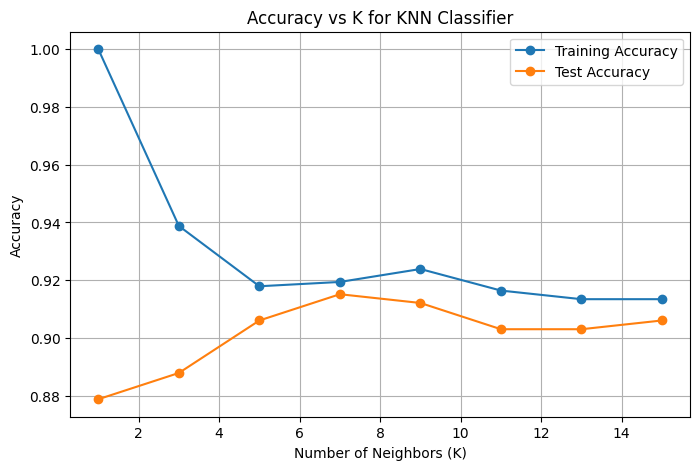

In [27]:
# -----------------------------------------------
# Accuracy vs K Plot for KNN (Visual Intuition)
# -----------------------------------------------

from sklearn.metrics import accuracy_score

# List of K values to evaluate
k_values = [1, 3, 5, 7, 9, 11, 13, 15]

train_accuracies = []
test_accuracies = []

# Train and evaluate KNN for each K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Accuracy on training data
    train_acc = accuracy_score(y_train, knn.predict(X_train))
    train_accuracies.append(train_acc)
    
    # Accuracy on test data
    test_acc = accuracy_score(y_test, knn.predict(X_test))
    test_accuracies.append(test_acc)

# Plot Accuracy vs K
plt.figure(figsize=(8, 5))
plt.plot(k_values, train_accuracies, marker='o', label="Training Accuracy")
plt.plot(k_values, test_accuracies, marker='o', label="Test Accuracy")

plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K for KNN Classifier")
plt.legend()
plt.grid(True)
plt.show()
